# Problem 7

In [1]:
%pylab inline

import numpy as np
import os

from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_images(path):
    dataset = []
    for img in [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".bmp")]:
        dataset.append(np.dot(imread(img)[...,:3], [0.299, 0.587, 0.114]).reshape(-1))
    return np.array(dataset)

In [3]:
dataset = load_images("Lista07Dane/test2")

def show_face(face):
    imshow(face.reshape((165,120)), cmap="gray")

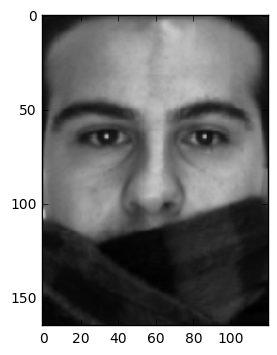

In [4]:
show_face(dataset[10])

In [5]:
pca = PCA(n_components=100, whiten=True)
pca.fit(dataset)

PCA(copy=True, n_components=100, whiten=True)

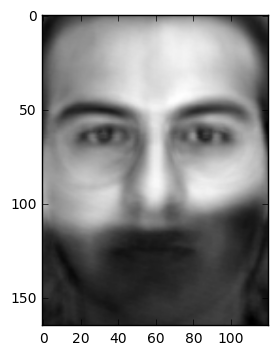

In [6]:
transformed = pca.transform(np.array([dataset[10]]))
show_face(pca.inverse_transform(transformed))

In [7]:
from scipy import stats

def kNN(k, test_point, training_points, training_labels, treshold=None):
    distances = ((training_points - test_point)**2).sum(axis=1)
    indices = argsort(distances)
    if treshold:
        best_k = [training_labels[index] for index in indices[:k] if distances[index] < treshold]
        if not best_k:
            return None
    else:
        best_k = [training_labels[index] for index in indices[:k]]
    return stats.mode(array(best_k))[0][0]

In [16]:
def analyze_dims_with_knn(dims):
    errors_percentages = []
    labels = [i for i in range(100) for _ in range(26)]
    data = np.hstack([dataset, np.array(labels).reshape((len(labels), 1))])

    errors = [0,0,0,0,0]
    k_cross = 5
    random.shuffle(data)
    data = data.reshape((k_cross, data.shape[0]/k_cross, data.shape[1]))
    pca = PCA(n_components=dims, whiten=True)
    for i in range(k_cross):
        mask = np.array(range(k_cross)) != i
        test_set, training_set = data[i], data[mask].reshape(((k_cross-1)*data.shape[1], data.shape[2]))
        training_labels, test_labels = training_set[:, -1], test_set[:, -1]
        pca.fit(training_set[:, :-1])
        reduced_training_set = pca.transform(training_set[:, :-1])
        reduced_test_set = pca.transform(test_set[:, :-1])
        for k in [1,3,5,7,9]:
            for (test_data, test_label) in zip(reduced_test_set, test_labels):
                label = kNN(k, test_data, reduced_training_set, training_labels)
                if label != test_label:
                    errors[k/2] += 1
    errors_percentages = [(i*2+1, e*100.0/(k_cross*test_set.shape[0])) for i, e in enumerate(errors)]

    plot([k for (k, _) in errors_percentages], [error_rate for (_, error_rate) in errors_percentages], marker='x')

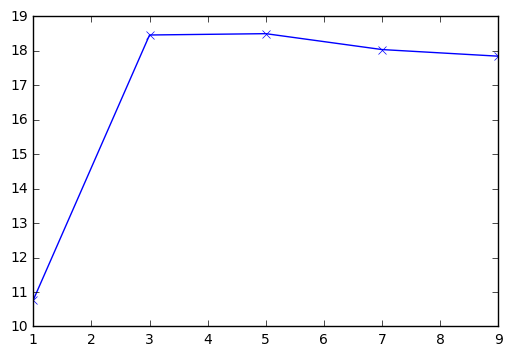

In [23]:
analyze_dims_with_knn(100)

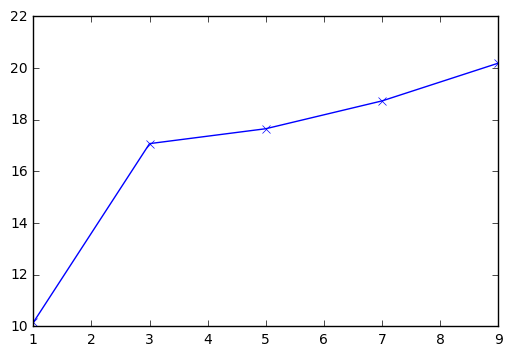

In [22]:
analyze_dims_with_knn(150)

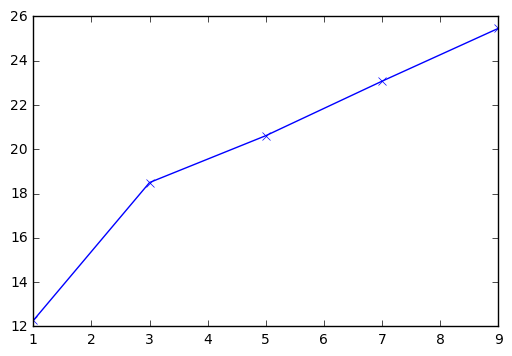

In [24]:
analyze_dims_with_knn(200)